In [69]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

Load Dataset

In [70]:
df = pd.read_csv('Mall_Customers .csv')

Data Understanding

In [71]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [73]:
df.shape

(200, 5)

In [74]:
df.describe()

#Look at min, max, mean, std for each numeric column.
#Values that are very far from the mean could be outliers.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Data Cleaning and Preprocessing

In [76]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [77]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [78]:
#Keep both columns (Female and Male)
# df=pd.get_dummies(df,columns=['Gender'],drop_first=False)
#If you want single column (Gender)
# df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [79]:
#One-Hot Encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

one_encoder=OneHotEncoder(sparse_output=False,drop='first')
encoded_array = one_encoder.fit_transform(df[['Gender']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array,columns=one_encoder.get_feature_names_out(['Gender']))
print(encoded_df)

     Gender_Male
0            1.0
1            1.0
2            0.0
3            0.0
4            0.0
..           ...
195          0.0
196          0.0
197          1.0
198          1.0
199          1.0

[200 rows x 1 columns]


In [80]:
#Combine with numeric columns
df_encoded = pd.concat([df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].reset_index(drop=True), encoded_df], axis=1)
print(df_encoded.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39          1.0
1   21                  15                      81          1.0
2   20                  16                       6          0.0
3   23                  16                      77          0.0
4   31                  17                      40          0.0


Note: For KMeans Clustering we we will df_encoded DataFrame(which is numerical),we will not use original DataFrame(df)

If we want we simply make concatination on df 
df = pd.concat([df[['Age', 'Annual Income (k$)','Spending Score (1-100)']].reset_index(drop=True), encoded_df], axis=1)
print(df.head())



In [81]:
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


Exploratory Data Analysis(EDA)

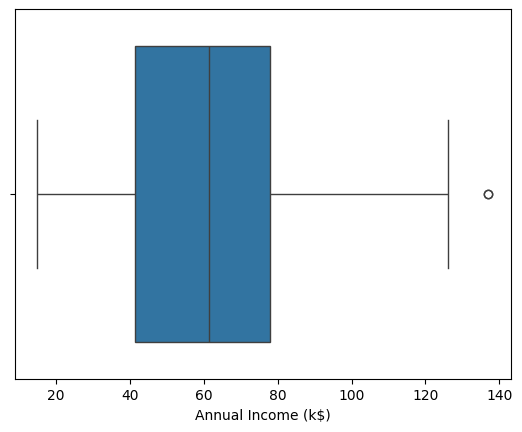

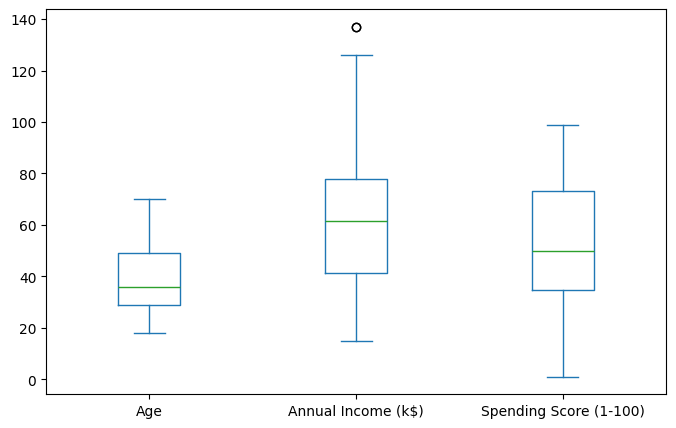

In [82]:

# Single column
sns.boxplot(x=df_encoded['Annual Income (k$)'])
plt.show()
# Multiple columns
df_encoded[['Age','Annual Income (k$)','Spending Score (1-100)']].plot(kind='box', figsize=(8,5))
plt.show()


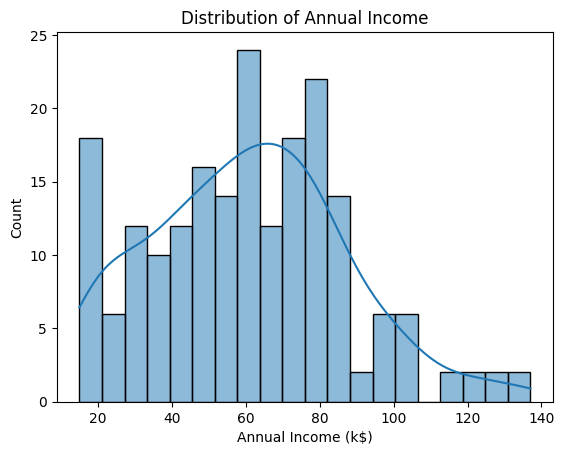

In [83]:
sns.histplot(df_encoded['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income')
plt.show()

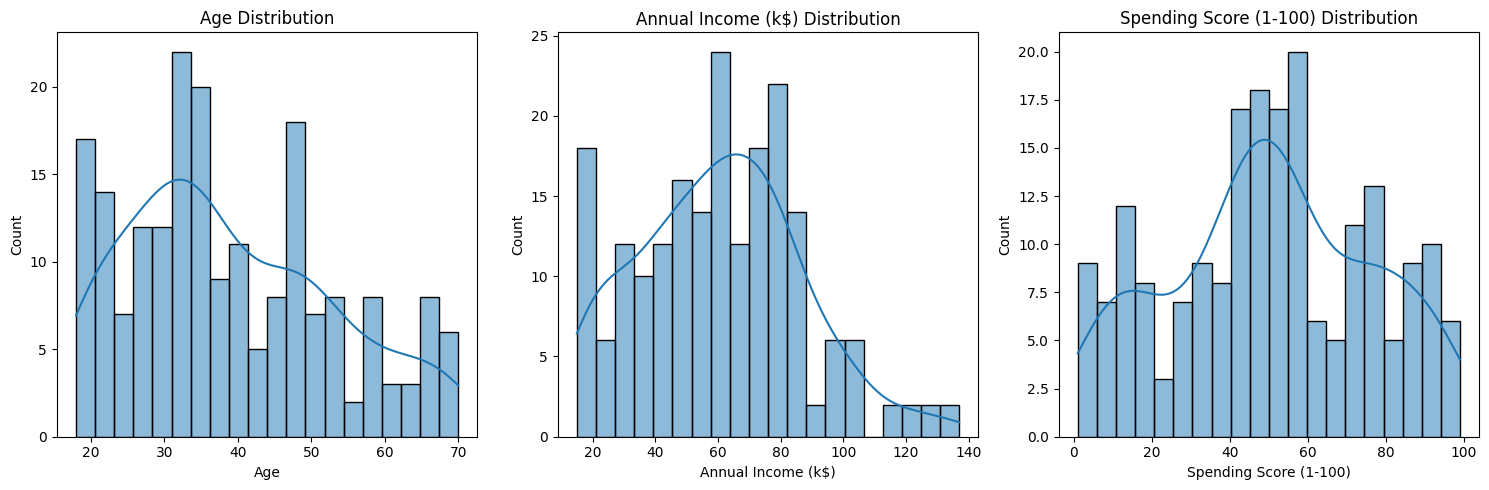

In [84]:
numeric_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize=(15,5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


In [85]:
Q1=df_encoded['Annual Income (k$)'].quantile(0.25)
Q3=df_encoded['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
lower_bond = Q1-1.5*IQR
Upper_bond = Q3+1.5*IQR

outliers=df_encoded[(df_encoded['Annual Income (k$)']<lower_bond)| (df_encoded['Annual Income (k$)']>Upper_bond)]
print(outliers)

     Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
198   32                 137                      18          1.0
199   30                 137                      83          1.0


In [93]:
# df_encoded['Annual Income (k$)'] = df_encoded['Annual Income (k$)'].clip(lower_bound, upper_bound)

#Limit the income to the upper bound:
df_encoded['Annual Income (k$)'] = df_encoded['Annual Income (k$)'].clip(upper=Upper_bond)  # upper bound from IQR



In [97]:
print(df_encoded[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']].skew())



Age                       0.485569
Annual Income (k$)        0.291249
Spending Score (1-100)   -0.047220
Gender_Male               0.243578
dtype: float64


In [88]:
# | Column                 | Skew  | Interpretation                          |
# | ---------------------- | ----- | --------------------------------------- |
# | Age                    | 0.49  | Slightly right-skewed, almost symmetric |
# | Annual Income (k$)     | 0.32  | Slightly right-skewed, minor skew       |
# | Spending Score (1-100) | -0.05 | Almost symmetric                        |
# | Gender_Male            | 0.24  | Almost symmetric / binary column        |

*Observation:*

#Values between -0.5 and 0.5 are generally considered approximately symmetric.

- Almost all columns are approximately symmetric.  
- No extreme skewness or significant outliers are present.  
- Therefore, we can proceed to K-Means clustering without transforming or capping numeric features.


In [95]:
df_encoded.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.517500,50.200000,0.440000
std,13.969007,26.143551,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,132.750000,99.000000,1.000000


count    200.000000
mean      60.517500
std       26.143551
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      132.750000
Name: Annual Income (k$), dtype: float64


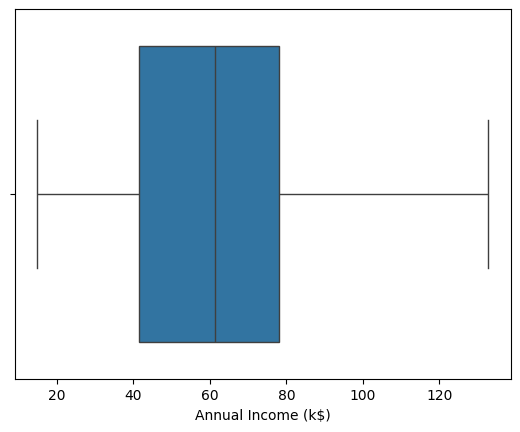

In [96]:
print(df_encoded['Annual Income (k$)'].describe())
sns.boxplot(x=df_encoded['Annual Income (k$)'])
plt.show()


Observation

After applying IQR-based outlier capping, the maximum Annual Income was reduced from extreme values to 132.75, keeping all other values intact.

The distribution of incomes is now more balanced, with no extreme outliers that could distort clustering.

The mean income is 60.52, and the standard deviation is 26.14, indicating a moderate spread in customer incomes.

Percentiles (Q1 = 41.5, Median = 61.5, Q3 = 78) show that the majority of customer incomes lie within a reasonable range.

